In [72]:
import glob
import os
import numpy as np

path = "/home/andrea/Desktop/Final/Baseline2last/2.2/Set2/"
files = []
for filename in glob.glob(os.path.join(path, '*.log')):
    files.append(filename)

fileOutput = open(path+"results.txt", "w")

results = [[0 for x in range(8)] for y in range(len(files))] 

for f in range(0, len(files)):
    file = open(files[f], "r")
    
    lines = []
    for line in file:
        lines.append(line)
    
    x = np.asarray(lines)
    
    throughput = np.zeros(3)
    latency = np.zeros(3)
    i = 2
    for rep in range(1, 4):
        countI = 0
 
        while x[i] != "ALL STATS\n":
            countI += 1
            i += 1

        i += 7  #4 per set, 5 per get, 7 per 50%50
        z = x[i][6:]
        m = 0
        numbers = 0
        singleLatency = ""
        singleThroughput = ""
        while numbers < 3:
            while z[m] == " ":
                m += 1
            while z[m] != " ":
                if numbers == 0:
                    singleThroughput += z[m]
                m += 1 
            numbers += 1
        while z[m] == " ":
                m += 1
        while z[m] != " ":
            singleLatency += z[m]
            m += 1

        latency[rep-1] += float(singleLatency)
        throughput[rep-1] += float(singleThroughput)
        i += 16
    
    results[f][0] = int(x[-12].split(" ")[0])
    results[f][1] = int(x[-13].split(" ")[0])
    results[f][2] = throughput[0]
    results[f][3] = throughput[1]
    results[f][4] = throughput[2]
    results[f][5] = latency[0]
    results[f][6] = latency[1]
    results[f][7] = latency[2]
    
results = np.asarray(results)
results = results[np.argsort(results[:, 0])]
           
for h in range(0, len(results)):         
    fileOutput.write("Clients: ")
    fileOutput.write(str(int(results[h][0])))
    fileOutput.write("\tThreads: ")
    fileOutput.write(str(int(results[h][1])))
    fileOutput.write('\nThroughput: ')
    fileOutput.write(str(results[h][2])+ " " + str(results[h][3]) + " " + str(results[h][4]))
    fileOutput.write('\nLatency: ')
    fileOutput.write(str(results[h][5]) +" " + str(results[h][6]) + " " + str(results[h][7]))
    fileOutput.write('\n\n')

fileOutput.close()


In [23]:
numOfRepetitions = 3
numOfClients = np.zeros(11) 
throughput = np.zeros((11, numOfRepetitions)) 
errThroughput = np.zeros(11) 
latency = np.zeros((11, numOfRepetitions))
errLatency = np.zeros(11) 

files = []
files.append(open("/home/andrea/Desktop/Final/Baseline2last/2.2/Set1/results.txt"))
files.append(open("/home/andrea/Desktop/Final/Baseline2last/2.2/Set2/results.txt"))
#files.append(open("/home/andrea/Desktop/Final/Baseline2last/2.1/Set3/results.txt"))


for f in range(0, len(files)):
    lines = []
    for line in files[f]:
        lines.append(line)
    x = np.asarray(lines)
    i = 0
    index = 0
    while i < len(x):
        clients = int(x[i].split("\t")[0].split(" ")[1]) * int(x[i].split("\t")[1].split(" ")[1])
        numOfClients[index] += clients
       
        
        throughput[index][0] += float(x[i+1].split()[1])
        throughput[index][1] += float(x[i+1].split()[2])
        throughput[index][2] += float(x[i+1].split()[3])
        
        latency[index][0] += float(x[i+2].split()[1])
        latency[index][1] += float(x[i+2].split()[2])
        latency[index][2] += float(x[i+2].split()[3])

        i += 4
        index += 1
        
latency2 = latency / len(files)
numOfClients2 = numOfClients.astype(dtype=int)

errThroughput2 = np.std(throughput, axis = 1)
errLatency2 = np.std(latency2, axis = 1)

throughput2 = np.mean(throughput, axis = 1)
latency2 = np.mean(latency2, axis = 1)

In [21]:
numOfRepetitions = 3
numOfClients = np.zeros(11) 
throughput = np.zeros((11, numOfRepetitions)) 
errThroughput = np.zeros(11) 
latency = np.zeros((11, numOfRepetitions))
errLatency = np.zeros(11) 

files = []
files.append(open("/home/andrea/Desktop/Final/Baseline2last/2.2/Get1/results.txt"))
files.append(open("/home/andrea/Desktop/Final/Baseline2last/2.2/Get2/results.txt"))
#files.append(open("/home/andrea/Desktop/Final/Baseline2last/2.1/Get3/results.txt"))

for f in range(0, len(files)):
    lines = []
    for line in files[f]:
        lines.append(line)
    x = np.asarray(lines)
    i = 0
    index = 0
    while i < len(x):
        clients = int(x[i].split("\t")[0].split(" ")[1]) * int(x[i].split("\t")[1].split(" ")[1])
        numOfClients[index] += clients
       
        #prendo i valori delle 3 ripetizioni e li metto in throughput 
        # (i.e. sommo i valori delle diverse VM a parità di ripetizione)
        throughput[index][0] += float(x[i+1].split()[1])
        throughput[index][1] += float(x[i+1].split()[2])
        throughput[index][2] += float(x[i+1].split()[3])
        
        latency[index][0] += float(x[i+2].split()[1])
        latency[index][1] += float(x[i+2].split()[2])
        latency[index][2] += float(x[i+2].split()[3])

        i += 4
        index += 1
        
latency1 = latency / len(files)
numOfClients1 = numOfClients.astype(dtype=int)

errThroughput1 = np.std(throughput, axis = 1)
errLatency1 = np.std(latency1, axis = 1)

throughput1 = np.mean(throughput, axis = 1)
latency1 = np.mean(latency1, axis = 1)

In [4]:
import matplotlib.pyplot as plt

In [5]:
x = np.mean(numOfClients*1000/throughput1 - latency1)
y = np.mean(numOfClients*1000/throughput2 - latency2)
print((x+y)/2)

-0.490693359487


In [38]:
plt.figure(figsize=(27, 20))
plt.errorbar(numOfClients, latency1, yerr=errLatency1, fmt='-o',  linewidth=3, markersize = 10, label="Read Only", capsize = 7, color="b")
plt.errorbar(numOfClients, latency2, yerr=errLatency2, fmt='-o',  linewidth=3, markersize = 10, label="Write Only", capsize = 7, color="r")
plt.legend(loc=2, fontsize=35)
plt.title('Average Response Time over number of virtual clients\n1 client VM (2 memtier instances), 2 servers', fontsize= 40)
plt.xlabel("Number of Clients", fontsize= 35)
plt.ylabel("Avg. Response Time [msec]", fontsize= 35)
plt.rc('grid', linestyle="-.", color ='grey')
plt.grid(True)
plt.xticks(numOfClients)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(xmin=0)
plt.ylim(ymin=0)

(0, 5.1255686462730914)

In [39]:
plt.savefig('/home/andrea/Desktop/Final/Baseline2last/2.2/responseTime.png')

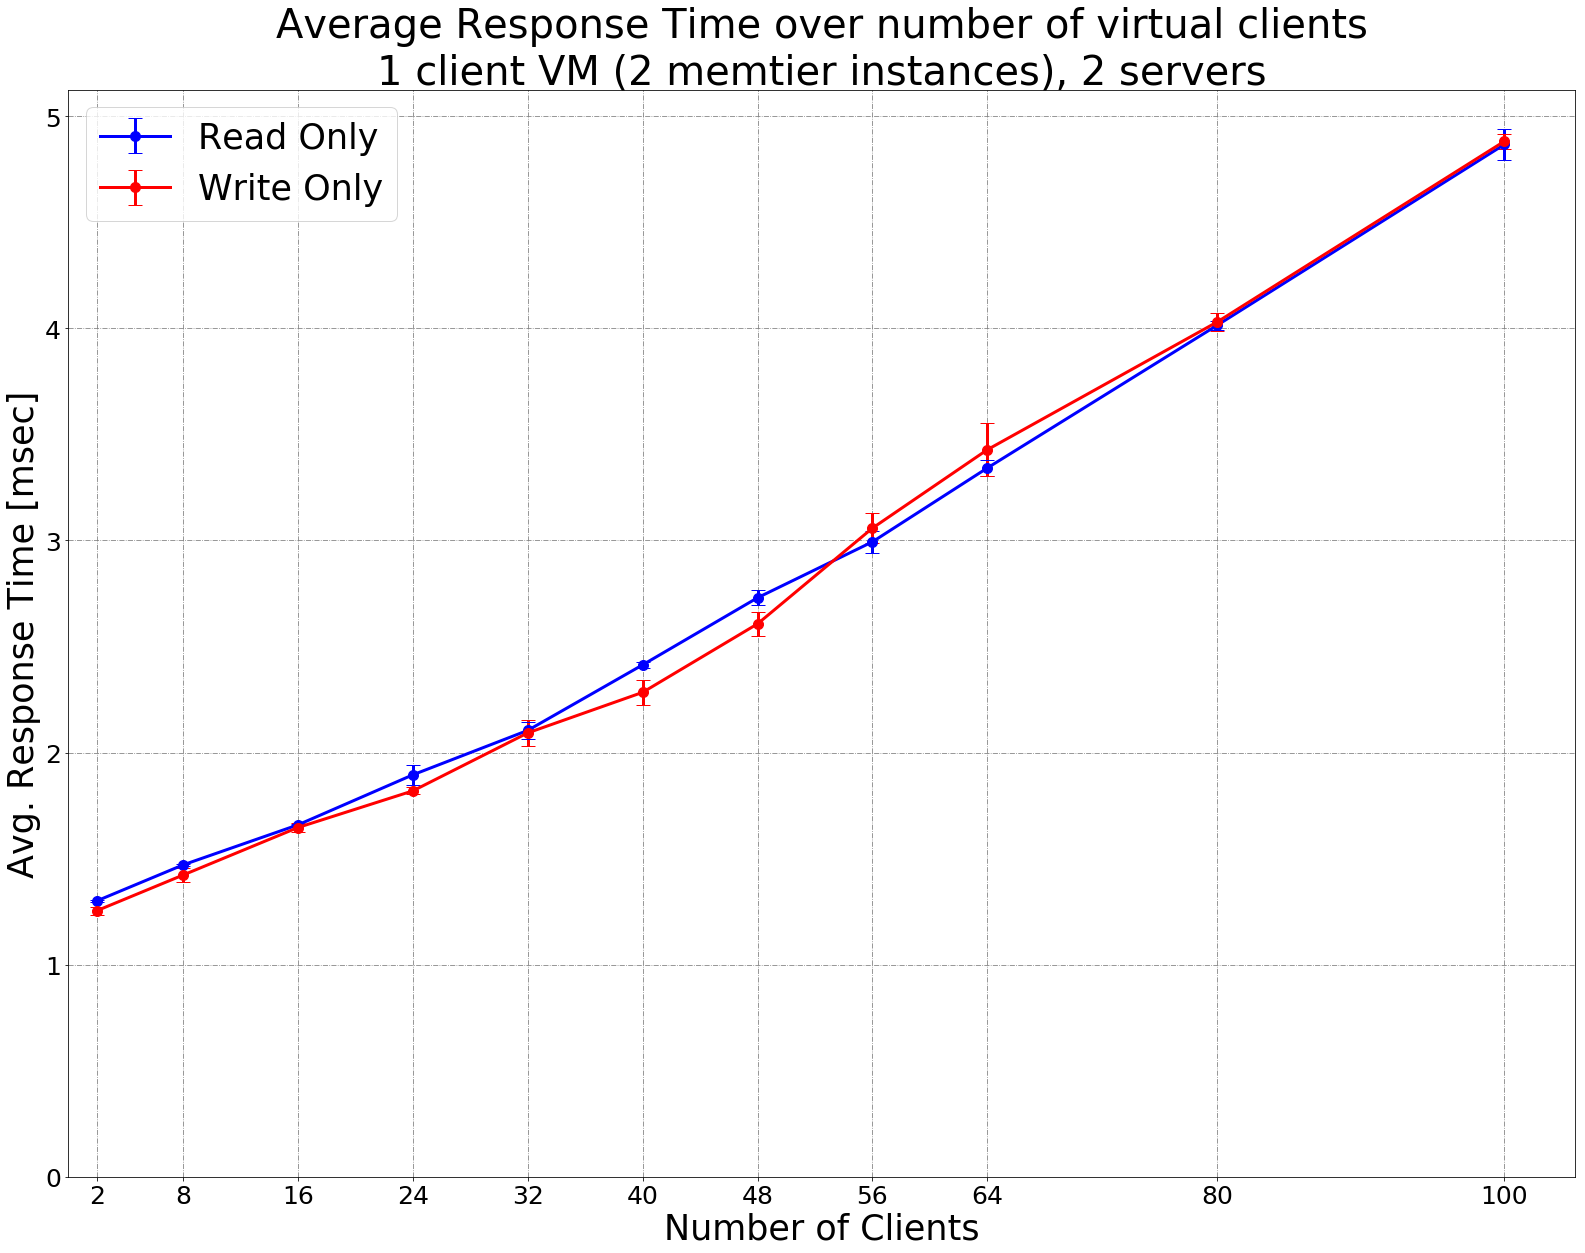

In [37]:
plt.show()

In [151]:
plt.figure(figsize=(40, 30))
plt.errorbar(numOfClients, latency1, yerr=errLatency1, fmt='-o',  linewidth=3, markersize = 10, capsize=7, label="Read Only", color="b")
plt.errorbar(numOfClients, latency2, yerr=errLatency2, fmt='-o',  linewidth=3.0, markersize = 10, capsize=7, label="Write Only", color="r")
plt.plot(numOfClients, numOfClients*1000/throughput1, linewidth=3, markersize = 10, color="g")
plt.plot(numOfClients, numOfClients*1000/throughput2, linewidth=3, markersize = 10,color="C1")

plt.legend(loc=2, fontsize=35)
plt.title('Average Response Time over number of virtual clients\n1 client VM (2 memtier instances), 2 servers', fontsize= 40)
plt.xlabel("Number of Clients", fontsize= 35)
plt.ylabel("Avg. Response Time [msec]", fontsize= 35)
plt.rc('grid', linestyle="-.", color ='grey')
plt.grid(True)
plt.xticks(numOfClients)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(xmin=0)
plt.ylim(ymin=0)

(0, 5.1460098554728901)

In [112]:
#plt.savefig('/home/andrea/Desktop/Final/Baseline2last/2.2/responseTime.png')

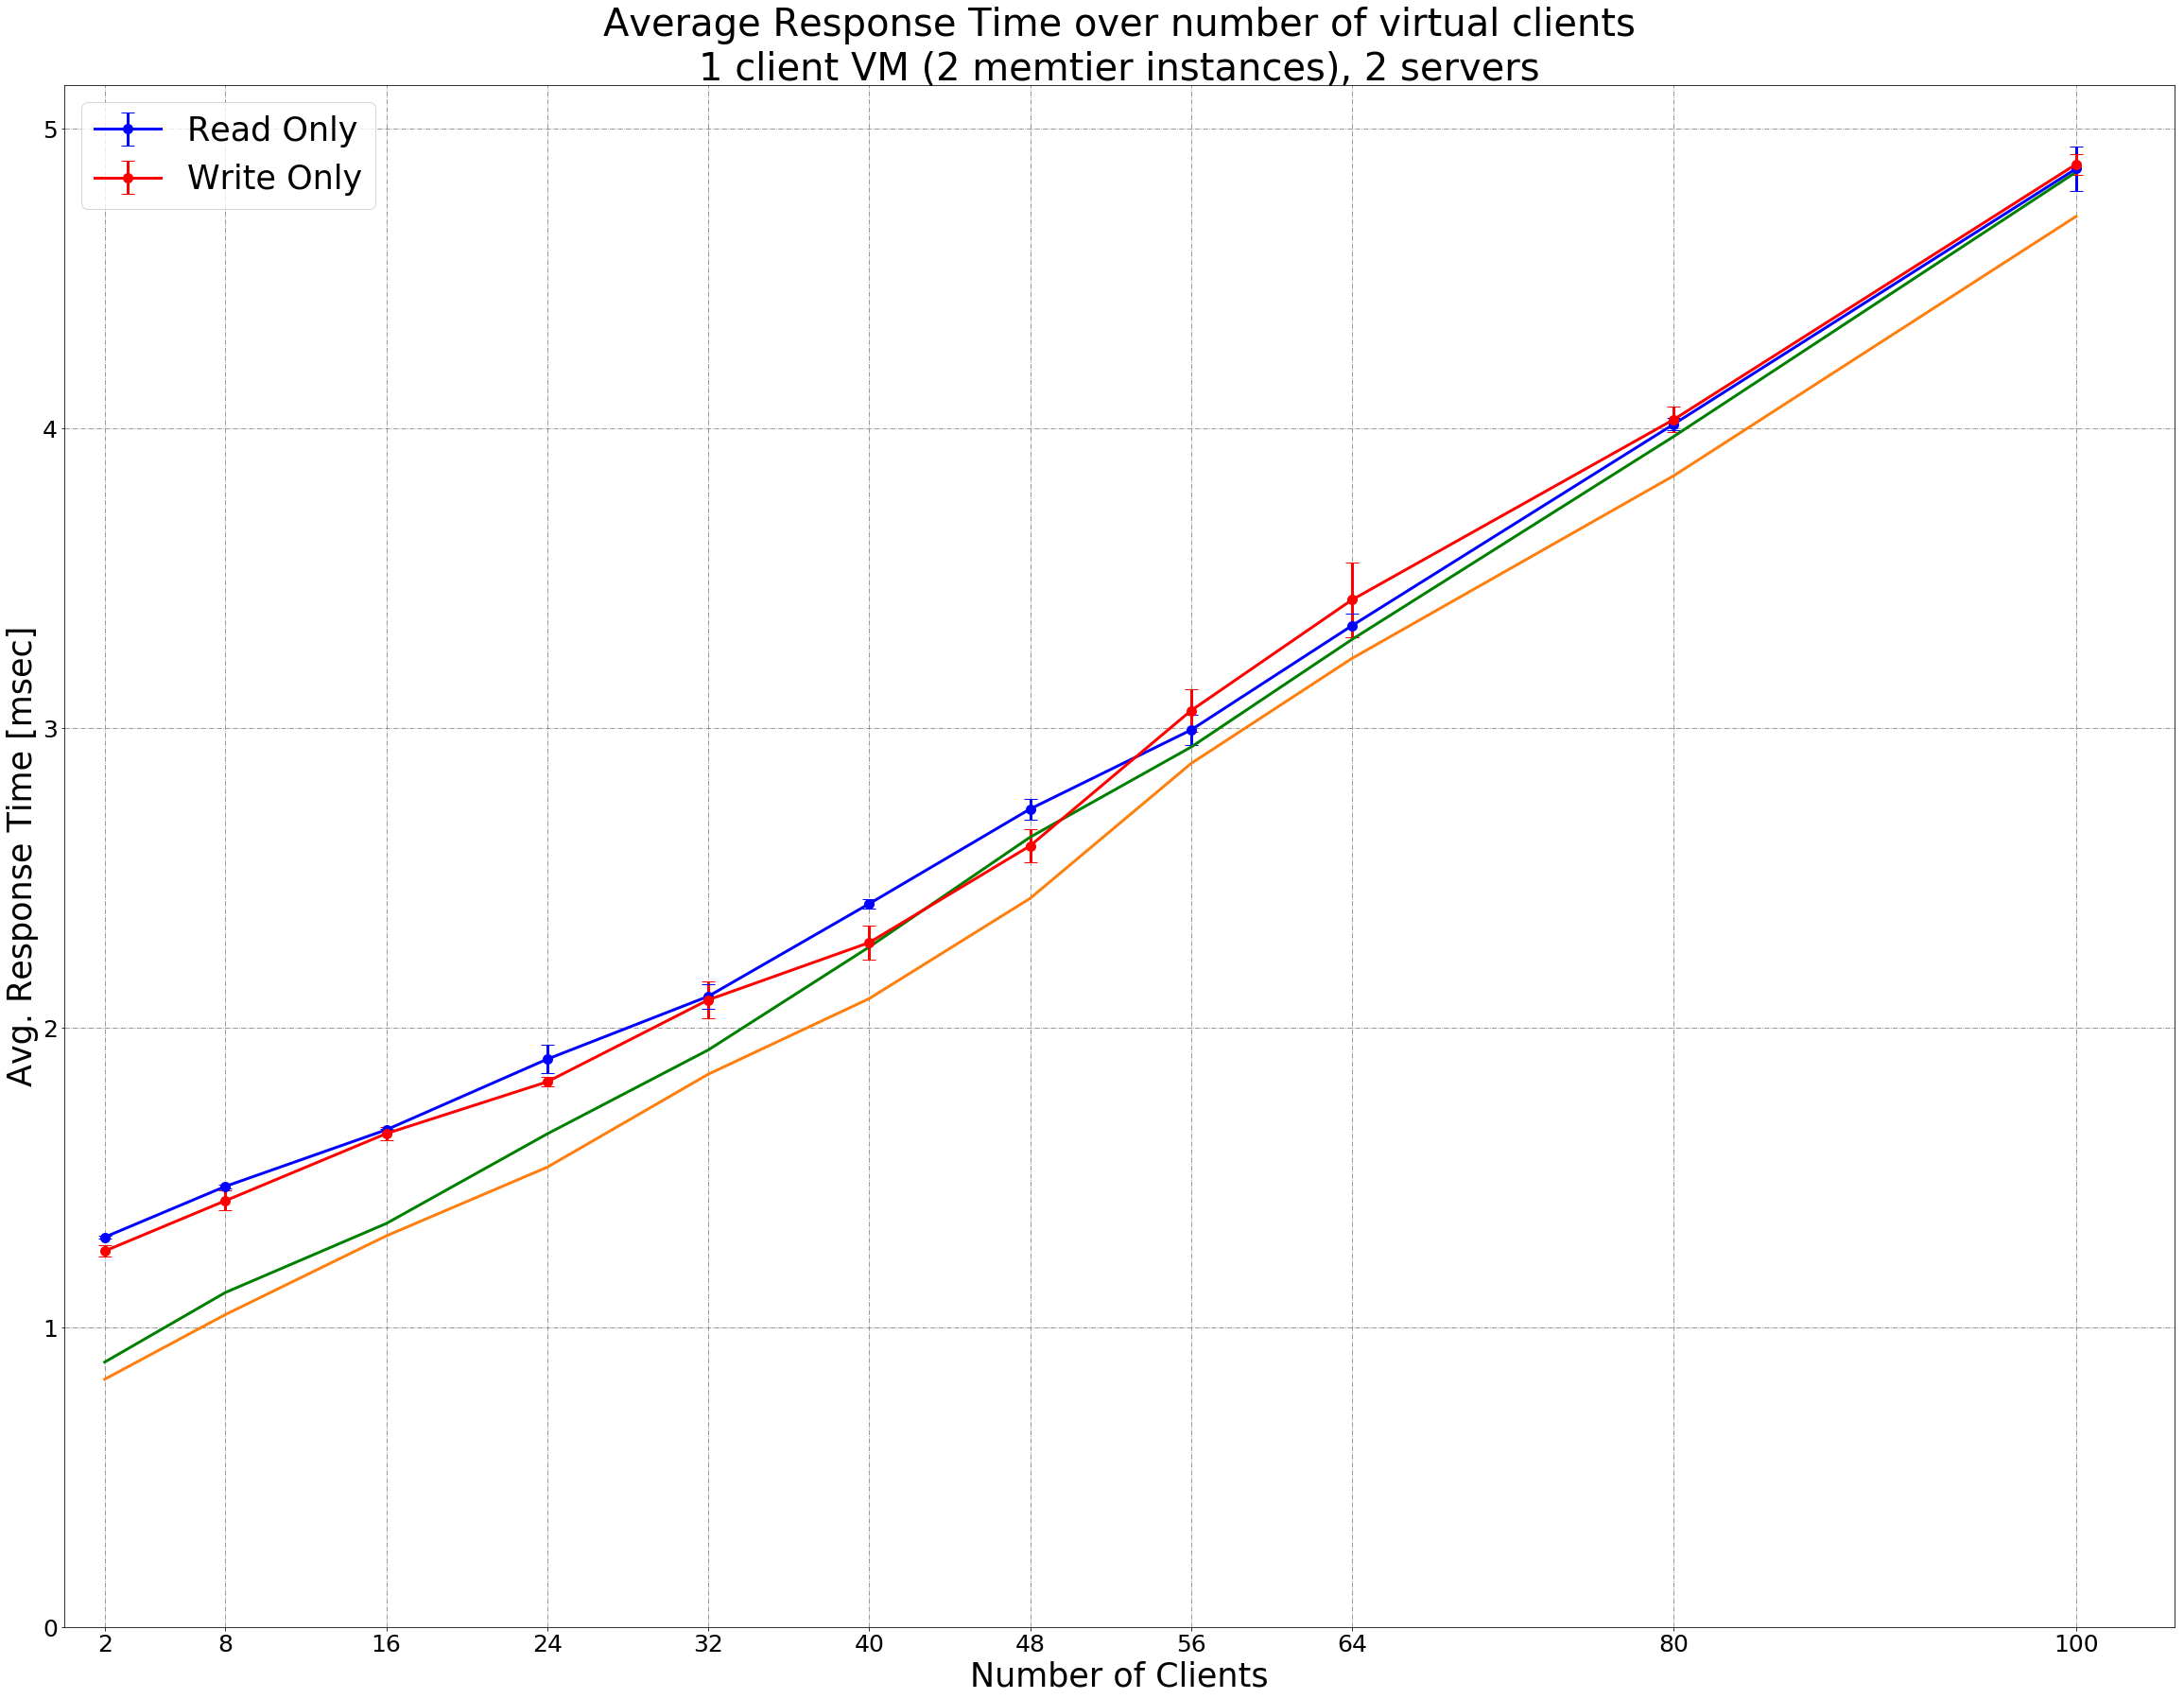

In [152]:
plt.show()